# Logistic regression with many features

Let's repeat what we did for the HMX example.
Instead of using a linear model inside the sigmoid, we will use a quadratic model.
That is, the probability of an explosion will be:
$$
p(y=1|x,\mathbf{w}) = \operatorname{sigm}\left(w_0 + w_1 x + w_2 x^2\right).
$$
Let's load the data firs:

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(rc={"figure.dpi":100, 'savefig.dpi':300})
sns.set_context('notebook')
sns.set_style("ticks")
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina', 'svg')
import numpy as np
import scipy.stats as st
import pandas as pd
import requests
import os
def download(url, local_filename=None):
    """
    Downloads the file in the ``url`` and saves it in the current working directory.
    """
    data = requests.get(url)
    if local_filename is None:
        local_filename = os.path.basename(url)
    with open(local_filename, 'wb') as fd:
        fd.write(data.content)

In [7]:
# Download the data file:
url = 'https://raw.githubusercontent.com/PurdueMechanicalEngineering/me-297-intro-to-data-science/master/activities/hmx_data.csv'
download(url)
# Load the data using pandas
data = pd.read_csv('hmx_data.csv')
# Extract data for regression
# Heights as a numpy array
x = data['Height'].values
# The labels must be 0 and 1
# We will use a dictionary to indicate our labeling
label_coding = {'E': 1, 'N': 0}
y = np.array([label_coding[r] for r in data['Result']])
data['y'] = y
data.head()

,Height,Result,y
0,40.5,E,1
1,40.5,E,1
2,40.5,E,1
3,40.5,E,1
4,40.5,E,1


Now let's train a second degree polynomial model:

In [9]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
# Make the design matrix
poly = PolynomialFeatures(2)
Phi = poly.fit_transform(x[:, None])
# Train the model (penalty = 'none' means that we do not add a prior on the weights)
# we are effectively just maximizing the likelihood of the data
model = LogisticRegression(penalty='none', fit_intercept=False).fit(Phi, y)

Here are the model parameters:

In [10]:
model.coef_

array([[-0.02784038, -0.41748133,  0.01335223]])

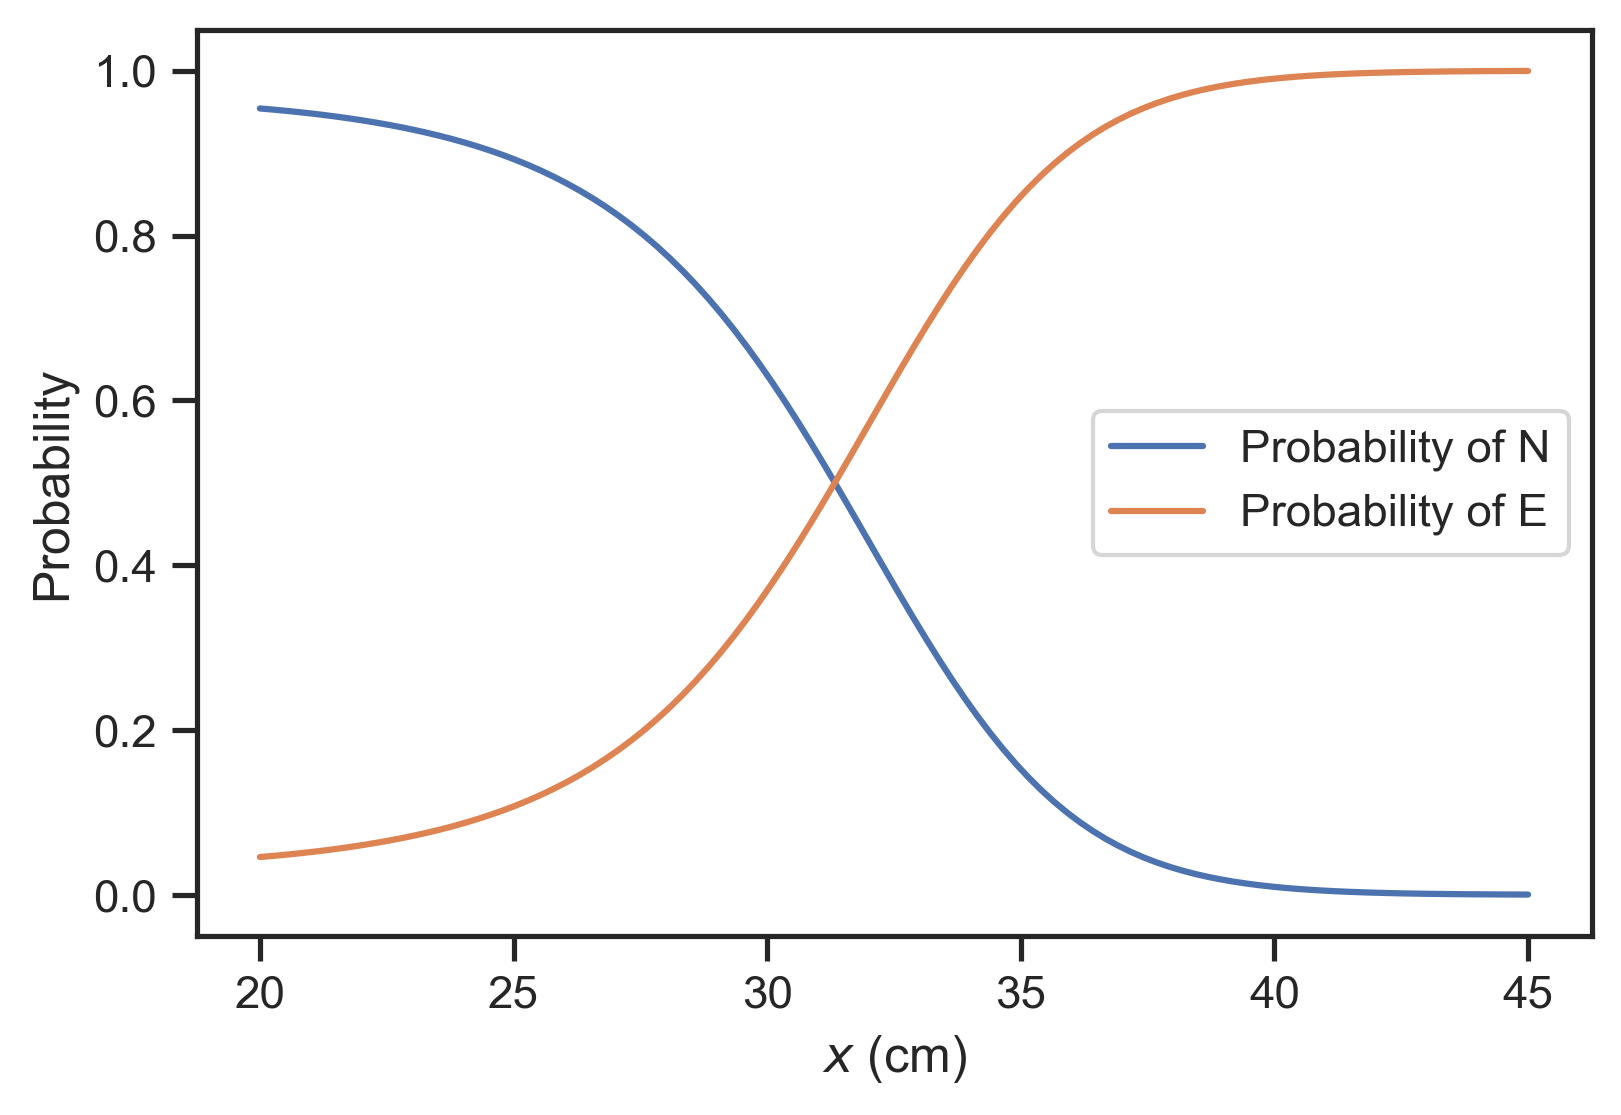

In [11]:
fig, ax = plt.subplots(dpi=150)
xx = np.linspace(20.0, 45.0, 100)
Phi_xx = get_polynomial_design_matrix(xx[:, None], degree)
predictions_xx = model.predict_proba(Phi_xx)
ax.plot(xx, predictions_xx[:, 0], label='Probability of N')
ax.plot(xx, predictions_xx[:, 1], label='Probability of E')
ax.set_xlabel('$x$ (cm)')
ax.set_ylabel('Probability')
plt.legend(loc='best');

### Questions

+ Do you think that it is worth going to a second degree model? Can you think of a way to compare the two models?
+ Rerun the code above with polynomial degree 3, 4, and 5. What do you observe? Do you trust the results? Why or why not?